In [1]:
# DAVIS-ESPF-ESPF.ipynb
# Required packages: PyTDC, DeepPurpose

In [2]:
# Load the DAVIS dataset from TDC project

from tdc.multi_pred import DTI as datasets
data = datasets(name = 'DAVIS').get_data()
X_drug, X_target, y = data['Drug'], data['Target'], data['Y']

Found local copy...
Loading...
Done!


In [3]:
# Prepare train, val, and test sub-sets
# with Daylight encoding on molecule's SMILES strings
# and AAC encoding on protein's sequence strings

from DeepPurpose import utils, DTI
drug_encoding, target_encoding = 'ESPF', 'ESPF'
train, val, test = utils.data_process(X_drug, X_target, y, 
    drug_encoding, target_encoding) 

Drug Target Interaction Prediction Mode...
in total: 25772 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 7329578. Total time 0.0 hours
Validation at Epoch 1 with loss:1984833, MSE: 2342597 , Pearson Correlation: -0.0717 with p-value: 2.69E-04 , Concordance Index: 0.44852
Training at Epoch 2 iteration 0 with loss 2530405. Total time 0.00277 hours
Validation at Epoch 2 with loss:1396467, MSE: 1405138 , Pearson Correlation: 0.35743 with p-value: 1.62E-78 , Concordance Index: 0.69228
Training at Epoch 3 iteration 0 with loss 1389993. Total time 0.00583 hours
Validation at Epoch 3 with loss:1643028, MSE: 1201932 , Pearson Correlation: 0.49909 with p-value: 2.05E-162 , Concordance Index: 0.75595
Training at Epoch 4 iteration 0 with loss 1132798. Total time 0.00861 hours
Validation at Epoch 4 with loss:1894139, MSE: 1167423 , Pearson Correlation: 0.51897 with p-value: 1.04E-177 , Concordance Index: 0.76713
Training at Epoch 5 iteration 0 with loss 1124288. Total time 0.01166 hours
Validati

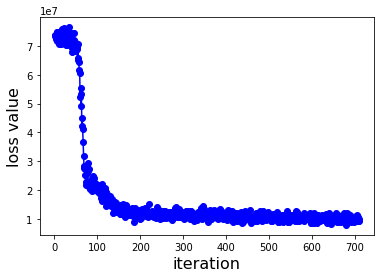

In [4]:
# Create a new model with default configuration options
# And train the model

config = utils.generate_config(drug_encoding, target_encoding)
model = DTI.model_initialize(**config)
model.train(train, val, test)

In [5]:
# Save the model

model.save_model('DAVIS-ESPF-ESPF')